# This HW has the following requirements.

- Rename this Jupyter Notebook as yourlastname_firstinitial_HW_Superstoresales.ipynb.
- Import **SuperstoreSales.xlsx**.
- You should use multiple tables/charts to answer each question. Make sure to demonstrate your skills in both data transformation and data visualization.
- Feel free to use multiple cells (more than one) to answer each question.
- Don't stop there! For each question, you also need to interpret the table(s) and chart(s). Provide a short summary of the results derived from the table or chart. Include your interpretations in Markdown cells located directly below the tables and charts. You may use bullet points and/or numbers for clarity.

Be creative! Be a good storyteller!

Note: Some questions are adapted from Teradatauniversitynetwork. Source of data: Tableau.com

All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal 

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

pd.set_option('display.max_columns', 500)

# Data Preparation

## Connect to the Data

In [2]:
# Import SuperstoreSales.xlsx
df = pd.read_excel('data/SuperstoreSales.xlsx')

In [3]:
# check column names, number of observations, data type
df.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Customer State', 'Zip Code', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

## Rename column names
- Remove extra spaces
- Lowercase names

In [4]:
# Remove extra spaces
df.columns = df.columns.str.replace(" ", "")
df.columns

Index(['OrderID', 'OrderDate', 'OrderPriority', 'OrderQuantity', 'Sales',
       'Discount', 'ShipMode', 'Profit', 'UnitPrice', 'ShippingCost',
       'CustomerName', 'CustomerState', 'ZipCode', 'Region', 'CustomerSegment',
       'ProductCategory', 'ProductSub-Category', 'ProductName',
       'ProductContainer', 'ProductBaseMargin', 'ShipDate'],
      dtype='object')

In [5]:
# Lowercase names
df.columns = df.columns.str.lower()
df.columns

Index(['orderid', 'orderdate', 'orderpriority', 'orderquantity', 'sales',
       'discount', 'shipmode', 'profit', 'unitprice', 'shippingcost',
       'customername', 'customerstate', 'zipcode', 'region', 'customersegment',
       'productcategory', 'productsub-category', 'productname',
       'productcontainer', 'productbasemargin', 'shipdate'],
      dtype='object')

In [6]:
df.dtypes

orderid                         int64
orderdate              datetime64[ns]
orderpriority                  object
orderquantity                   int64
sales                         float64
discount                      float64
shipmode                       object
profit                        float64
unitprice                     float64
shippingcost                  float64
customername                   object
customerstate                  object
zipcode                         int64
region                         object
customersegment                object
productcategory                object
productsub-category            object
productname                    object
productcontainer               object
productbasemargin             float64
shipdate               datetime64[ns]
dtype: object

In [7]:
# change to pandas date time 
df['orderdate'] = pd.to_datetime(df['orderdate'])
df.head()

,orderid,orderdate,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
0,3,2010-08-26,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
1,6,2012-01-03,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04
2,32,2011-05-28,High,15,140.5600,0.04,Regular Air,-128.380,8.46,8.99,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Computer Peripherals,"Imation 3.5 IBM Diskettes, 10/Box",Small Pack,0.79,2011-05-29
3,32,2011-05-28,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,Liz Pelletier,Ohio,44197,Central,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-05-29
4,32,2011-05-28,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-05-30


In [8]:
# Check if the order data is a pandas date time format 
df.dtypes

orderid                         int64
orderdate              datetime64[ns]
orderpriority                  object
orderquantity                   int64
sales                         float64
discount                      float64
shipmode                       object
profit                        float64
unitprice                     float64
shippingcost                  float64
customername                   object
customerstate                  object
zipcode                         int64
region                         object
customersegment                object
productcategory                object
productsub-category            object
productname                    object
productcontainer               object
productbasemargin             float64
shipdate               datetime64[ns]
dtype: object

## Inspect data

In [9]:
# check missing values
df.isna().sum()

orderid                0
orderdate              0
orderpriority          0
orderquantity          0
sales                  0
discount               0
shipmode               0
profit                 0
unitprice              0
shippingcost           0
customername           0
customerstate          0
zipcode                0
region                 0
customersegment        0
productcategory        0
productsub-category    0
productname            0
productcontainer       0
productbasemargin      0
shipdate               0
dtype: int64

In [10]:
# summary statistics
df.describe()

,orderid,orderquantity,sales,discount,profit,unitprice,shippingcost,zipcode,productbasemargin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.179783,25.575426,1774.860490,0.049664,181.401194,89.310426,12.856427,48256.097631,0.512886
std,17260.883447,14.482837,3585.107345,0.031826,1224.670845,290.361311,17.318257,30689.098271,0.135991
min,3.000000,1.000000,2.240000,0.000000,-16253.680000,0.990000,0.490000,501.000000,0.350000
25%,15011.500000,13.000000,143.035000,0.020000,-82.764250,6.480000,3.300000,21794.000000,0.380000
50%,29857.000000,26.000000,449.420000,0.050000,-1.490000,20.990000,6.070000,43317.000000,0.520000
75%,44596.000000,38.000000,1706.285000,0.080000,166.712250,85.990000,13.990000,81221.000000,0.590000
max,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,99403.000000,0.850000


## Indexing 

In [11]:
# index is like primary key in database (unique number assigned to each observation)
# check index column
df.index

RangeIndex(start=0, stop=8399, step=1)

In [12]:
# then set datetime [date] column as index (primary key). This is for time series analysis below.
# orderdate
df = df.set_index('orderdate')
df.head()

,orderid,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
orderdate,,,,,,,,,,,,,,,,,,,,
2010-08-26,3,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,Muhammed MacIntyre,New Jersey,7514,East,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-09-02
2012-01-03,6,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,Ruben Dartt,New York,10457,East,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-01-04
2011-05-28,32,High,15,140.5600,0.04,Regular Air,-128.380,8.46,8.99,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Computer Peripherals,"Imation 3.5 IBM Diskettes, 10/Box",Small Pack,0.79,2011-05-29
2011-05-28,32,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,Liz Pelletier,Ohio,44197,Central,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-05-29
2011-05-28,32,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,Liz Pelletier,Ohio,44197,Central,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-05-30


In [13]:
# sort the data by datatimeindex
df = df.sort_index()
df.head()

,orderid,orderpriority,orderquantity,sales,discount,shipmode,profit,unitprice,shippingcost,customername,customerstate,zipcode,region,customersegment,productcategory,productsub-category,productname,productcontainer,productbasemargin,shipdate
orderdate,,,,,,,,,,,,,,,,,,,,
2008-11-13,32418,Not Specified,5,1244.190,0.08,Delivery Truck,-131.3100,243.98,43.32,Marina Lichtenstein,Michigan,49642,Central,Corporate,Furniture,Chairs & Chairmats,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Jumbo Drum,0.55,2008-11-14
2008-11-13,1028,High,6,165.750,0.03,Regular Air,-28.4600,28.48,1.99,Matt Collins,Michigan,48001,Central,Consumer,Technology,Computer Peripherals,"Memorex 4.7GB DVD+RW, 3/Pack",Small Pack,0.40,2008-11-14
2008-11-13,1028,High,11,2021.147,0.01,Regular Air,-60.3900,205.99,5.99,Matt Collins,Michigan,48001,Central,Consumer,Technology,Telephones and Communication,3285,Small Box,0.59,2008-11-15
2008-11-13,57253,Critical,29,653.540,0.06,Delivery Truck,-1358.9000,20.98,53.03,Darren Budd,Texas,73301,Central,Consumer,Office Supplies,Storage & Organization,"Tennsco Lockers, Gray",Jumbo Drum,0.78,2008-11-15
2008-11-13,57253,Critical,49,240.300,0.08,Regular Air,-154.6175,4.91,5.68,Darren Budd,Texas,73301,Central,Consumer,Office Supplies,Binders and Binder Accessories,"Acco Pressboard Covers with Storage Hooks, 14 ...",Small Box,0.36,2008-11-14


# Exploratory Data Analysis

## Summary Questions

### What is the total sales volume? 

In [14]:
print('The total sales volume is: ', round(df['sales'].sum(), 2))

The total sales volume is:  14907053.25


### What is the total profit?

In [15]:
print('The total profit is: ',round(df['profit'].sum(), 2))

The total profit is:  1523588.63


## Time series visualization

### Visualize the sales

Text(0, 0.5, 'Sales')

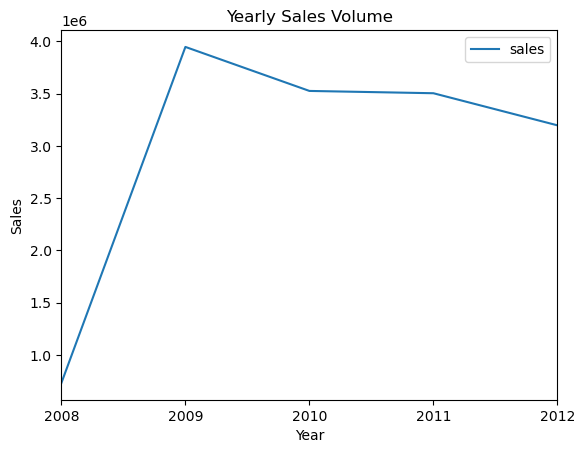

In [16]:
# Visualize the yearly sales volume (Use resample())
df.resample('Y').agg({'sales':'sum'}).plot()
plt.title('Yearly Sales Volume')
plt.xlabel('Year')
plt.ylabel('Sales')

<AxesSubplot: xlabel='orderdate'>

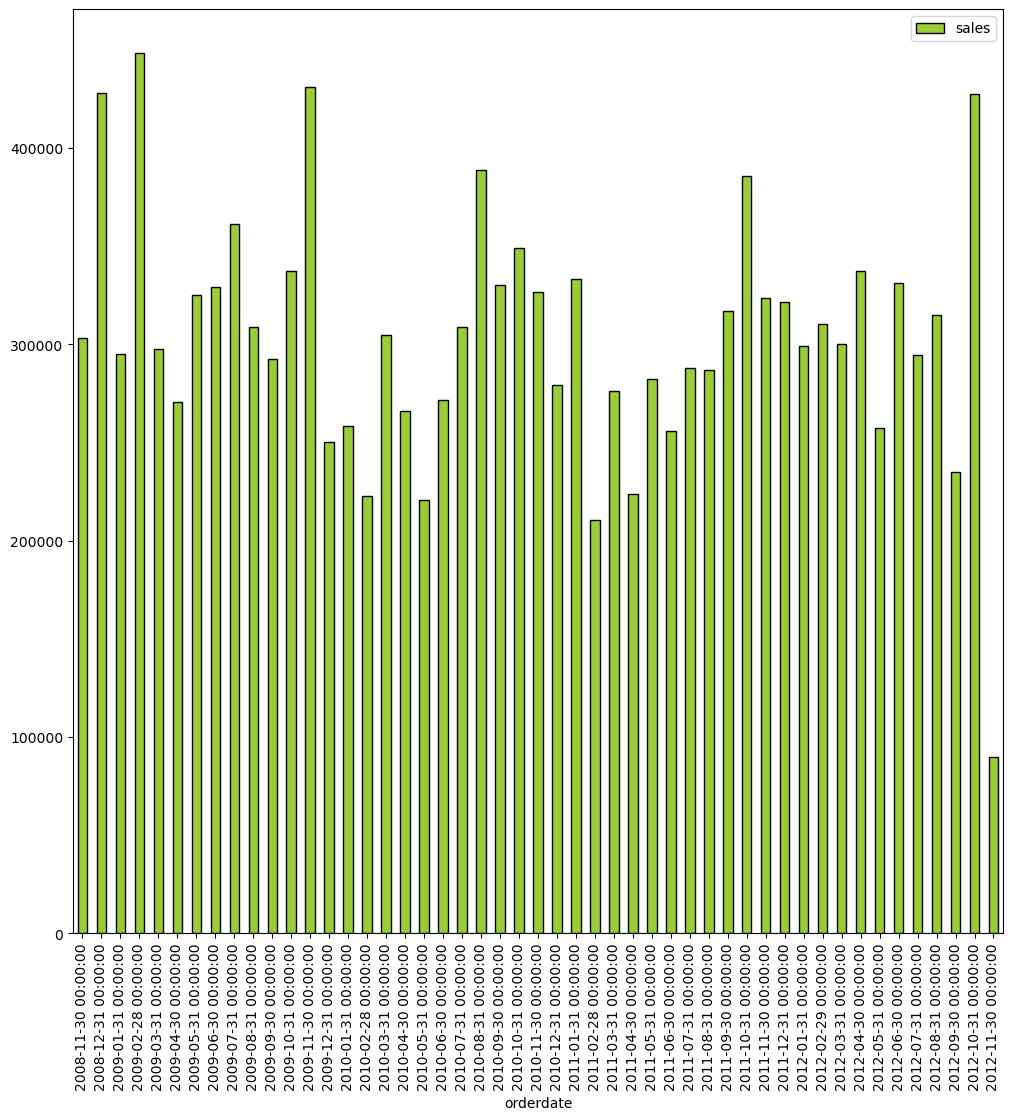

In [17]:
# Visualize the monthly sales volume (Use resample())
df.resample('M').agg({'sales':'sum'}).plot(kind = 'bar', figsize = (12, 12),
                                          edgecolor = 'black', facecolor = 'yellowgreen')


# Business Intellience: Detailed Questions

### What is the sales volume for each 'product category', and which category is performing well?

In [18]:
df.groupby('productcategory') # that colmn has to be categorical 

Text(0, 0.5, '')

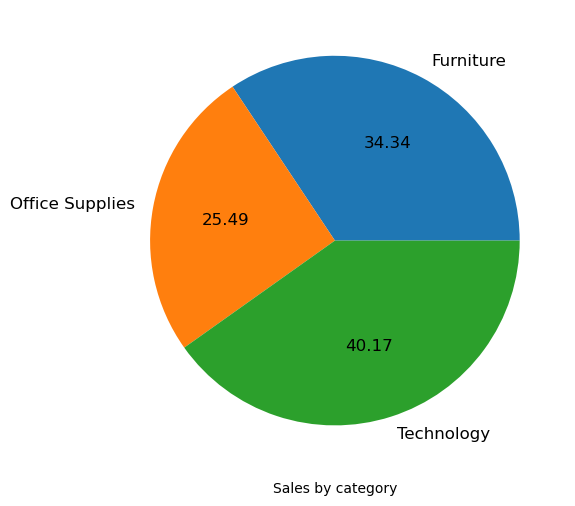

In [19]:
g = df.groupby('productcategory')['sales'].sum()

g.plot(kind='pie', 
       autopct='%.2f', fontsize=12, figsize=(6, 6));

plt.xlabel('Sales by category')
plt.ylabel('')

I would expect the Technology product category to outperform the other two product categories.

Now, take a closer look at the sub-categories within the Technology product category.

### Which productsub-category within the Technology product category is the best in terms of sales?

In [20]:
# Create a new data frame for Technology category 
Technology_sales = df[df['productcategory'] == 'Technology']

In [21]:
# groupby sub categories and sort values
Technology_sales.groupby('productsub-category')['sales'].sum().sort_values(ascending = False)

productsub-category
Office Machines                 2171342.760
Telephones and Communication    1889313.802
Copiers and Fax                 1130361.300
Computer Peripherals             796553.540
Name: sales, dtype: float64

In [22]:
# Alternatively, without splitting the data frame 
# group the values by product category and sub category 
grouped_sales = df.groupby(['productcategory', 'productsub-category'])['sales'].sum()

In [23]:
# sort the grouped sales values 
grouped_sales.reset_index().sort_values(by=['productcategory', 'sales'], ascending=[True, False])

,productcategory,productsub-category,sales
3,Furniture,Tables,1887214.932
1,Furniture,Chairs & Chairmats,1744144.730
0,Furniture,Bookcases,821982.470
2,Furniture,Office Furnishings,665912.350
12,Office Supplies,Storage & Organization,1099774.360
5,Office Supplies,Binders and Binder Accessories,1024521.850
4,Office Supplies,Appliances,747333.010
8,Office Supplies,Paper,449496.470
6,Office Supplies,Envelopes,176298.060
9,Office Supplies,Pens & Art Supplies,167525.030


### What are the top two product categories in terms of profit?

In [24]:
df.groupby('productcategory')['profit'].sum().sort_values(ascending = False).head(2)

productcategory
Technology         855437.2250
Office Supplies    515776.6045
Name: profit, dtype: float64

### Which region is more profitable compared to other regions? Are any regions experiencing financial losses? (Include product categories in this analysis.)

In [25]:
# Profit based on region only 
df.groupby('region')['profit'].sum().sort_values(ascending = False)

region
South      505678.7515
West       422868.1505
East       297802.5185
Central    297239.2090
Name: profit, dtype: float64

In [26]:
# profit based on region and product category
df.groupby(['region', 'productcategory'])['profit'].sum().sort_values(ascending = False)

region   productcategory
South    Technology         302117.5900
West     Technology         219514.0210
East     Technology         203053.3850
West     Office Supplies    145669.4595
South    Office Supplies    140659.2615
Central  Technology         130752.2290
         Office Supplies    121977.2900
East     Office Supplies    107470.5935
South    Furniture           62901.9000
West     Furniture           57684.6700
Central  Furniture           44509.6900
East     Furniture          -12721.4600
Name: profit, dtype: float64

Southern region is the most porfitable compared to others. Eastern regioin is experiencing financial losses in Furniture sales. 

### Which state in the East is least profitable? Include Product Category in your analysis. 

In [27]:
# create a new data frame for teh eastern region 
df_east = df[df['region'] == 'East']

In [28]:
# Profit based state and procuct category 
df_east.groupby(['customerstate', 'productcategory'])['profit'].sum().sort_values(ascending = True).head(3)

customerstate  productcategory
New Jersey     Furniture         -18171.95
Connecticut    Furniture         -12852.13
Mass           Furniture          -5651.18
Name: profit, dtype: float64

New Jersey is the least profitable state in the Eastern region. The major loss comes from Furniture category. 

### Nebraska

The following two questions are limited to the State of Nebraska.

#### For the State of Nebraska, which year was the least profitable? Which product was the least profitable?

In [29]:
# create a new data frame specific to Nebraska 
df_Nebraska = df[df['customerstate'] == 'Nebraska']

# Profit based year and procuct category 
df_east.groupby(['orderdate', 'productname'])['profit'].sum().sort_values(ascending = True).head(3)

orderdate   productname                                                  
2009-01-21  Polycom ViewStation™ ISDN Videoconferencing Unit                -16253.68
2008-11-19  Riverside Palais Royal Lawyers Bookcase, Royale Cherry Finish   -11053.60
2009-12-01  Okidata Pacemark 4410N Wide Format Dot Matrix Printer            -9643.07
Name: profit, dtype: float64

The least profitable year for Nebraska was 2009 for sales of Polycom ViewStation™ ISDN Videoconferencing Unit

#### Which geographic region ('zipcode') in Nebraska is the most profitable?

In [30]:
# Profit based Zipcode 
df_east.groupby('zipcode')['profit'].sum().sort_values(ascending = False).head(3)

zipcode
2139     25907.3925
8823     21243.5080
14210    21210.3110
Name: profit, dtype: float64

Zipcode 2139 is the most profitable region in Nebraska. 

### Overall, which types of furniture are unprofitable?

In [31]:
# create a new data frame specific to Furniture
df_Furniture = df[df['productcategory'] == 'Furniture']

In [32]:
df_Furniture.groupby('productsub-category')['profit'].sum().sort_values(ascending = True).head()

productsub-category
Tables                -61271.15
Bookcases             -33170.68
Office Furnishings     96878.40
Chairs & Chairmats    149938.23
Name: profit, dtype: float64

Tables are the most unprofitable furniture followed by Bookcases and Office Furnishings 

### Overall, which office supplies are the most profitable, and which ones require improvements in sales and profits?

In [33]:
# create a new data frame specific to Office supplies 
df_Office_Supplies = df[df['productcategory'] == 'Office Supplies']

In [34]:
# most profitable office supplies 
df_Office_Supplies.groupby('productsub-category')['profit'].sum().sort_values(ascending = False).head(3)

productsub-category
Binders and Binder Accessories    307174.1845
Appliances                         98023.0800
Envelopes                          48711.0800
Name: profit, dtype: float64

Binders and Binder Accessories is the most profitable office supplies 

In [35]:
# least profitable office supplies 
df_Office_Supplies.groupby('productsub-category')['profit'].sum().sort_values(ascending = True).head(3)

productsub-category
Scissors, Rulers and Trimmers   -7799.25
Rubber Bands                      -77.59
Storage & Organization           2516.94
Name: profit, dtype: float64

In [36]:
# low sales volume office supplies 
df_Office_Supplies.groupby('productsub-category')['sales'].sum().sort_values(ascending = True).head(3)

productsub-category
Rubber Bands                     15239.93
Labels                           39042.35
Scissors, Rulers and Trimmers    80996.31
Name: sales, dtype: float64

- In terms of profit Scissors, Rulers and Trimmers need improvement. 
- In terms of volume sales, Rubber Bands need improvement.

### Which types of technology products are profitable?

In [37]:
# create a new data frame specific to Technology
df_Technology = df[df['productcategory'] == 'Technology']

In [38]:
df_Technology.groupby('productsub-category')['profit'].sum().sort_values(ascending = False).head(3)

productsub-category
Telephones and Communication    316951.641
Office Machines                 276590.340
Copiers and Fax                 167361.464
Name: profit, dtype: float64

### Is there any relationship (or correlation) between “profits” and “sales”? Display the results of a statistical analysis and or visualization.

You can use visualization (e.g., scatter plot) and/or correlation analysis (e.g., corr())

In [39]:
# correlation analysis 
df.corr(numeric_only=True)

,orderid,orderquantity,sales,discount,profit,unitprice,shippingcost,zipcode,productbasemargin
orderid,1.000000,0.011461,-0.006822,-0.003568,-0.005849,-0.003867,-0.003857,-0.011369,-0.024529
orderquantity,0.011461,1.000000,0.220413,-0.010160,0.196062,-0.104341,-0.012162,0.017114,0.006781
sales,-0.006822,0.220413,1.000000,-0.018951,0.577657,0.602518,0.434261,-0.011301,0.157456
discount,-0.003568,-0.010160,-0.018951,1.000000,-0.038563,0.001760,-0.000269,0.002057,0.005559
profit,-0.005849,0.196062,0.577657,-0.038563,1.000000,-0.035542,-0.018124,-0.004923,-0.106292
unitprice,-0.003867,-0.104341,0.602518,0.001760,-0.035542,1.000000,0.239953,-0.007564,0.058523
shippingcost,-0.003857,-0.012162,0.434261,-0.000269,-0.018124,0.239953,1.000000,-0.018904,0.374660
zipcode,-0.011369,0.017114,-0.011301,0.002057,-0.004923,-0.007564,-0.018904,1.000000,0.006904
productbasemargin,-0.024529,0.006781,0.157456,0.005559,-0.106292,0.058523,0.374660,0.006904,1.000000


Sales and profit have a strong positive correlation (0.577657	) with each other. 

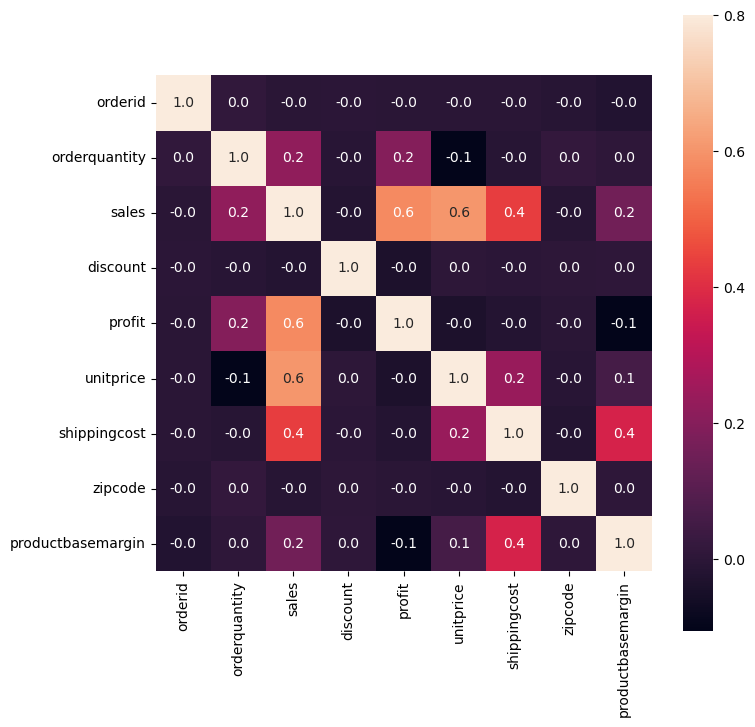

In [40]:
# correlation plot
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only = True), vmax=.8, square=True, annot=True, fmt=".1f");

### Overall, which year is least profitable? 
- Ignore year 2008 since it has only two months in the data

In [41]:
# create a new data frame that  excludes 2008
df_year = df[df.index.year != 2008]

#group and sort 
df_year.resample('Y')['profit'].sum().sort_values(ascending = True)

orderdate
2012-12-31    291141.9190
2010-12-31    337239.4165
2009-12-31    406718.5260
2011-12-31    419755.3845
Name: profit, dtype: float64

The least profitable year is 2012.

# Drill Down: What happend in 2009 & January 2009?

## Let's focus on the year 2009 and answer some questions below

In [42]:
# create a new data frame for year 2009
df_year_2009 = df[df.index.year == 2009]

### Which region performed so poorly? (in terms of profit)

In [43]:
df_year_2009.groupby('region')['profit'].sum().sort_values(ascending = True)

region
East        46657.2375
Central     78111.7495
West       121861.4615
South      160088.0775
Name: profit, dtype: float64

Eastern region performed the poorest in terms of profit in 2009. 

### Which zip code areas performed poorly?

In [44]:
df_year_2009.groupby('zipcode')['profit'].sum().sort_values(ascending = True).head(3)

zipcode
10501   -16557.0850
35077   -11928.9000
93456   -11522.6075
Name: profit, dtype: float64

10501, 35077, 93456 are the top three zip codes that performed poorly. 

### Which product category performed so poorly?

In [45]:
df_year_2009.groupby('productcategory')['profit'].sum().sort_values(ascending = True).head(3)

productcategory
Furniture           71904.900
Office Supplies    167174.061
Technology         167639.565
Name: profit, dtype: float64

Furniture is the product category that performed the worst in the year 2009. 

### Which productsub-category performed so poorly?

In [46]:
df_year_2009.groupby('productsub-category')['profit'].sum().sort_values(ascending = True).head(3)

productsub-category
Tables                          -10621.34
Scissors, Rulers and Trimmers    -2927.71
Rubber Bands                        27.82
Name: profit, dtype: float64

Tables, Scissors, Rulers and Trimmers, and Rubber Bands are the top three product sub categories that performed poor. 

### Which product ('productname') performed so poorly?

In [47]:
df_year_2009.groupby('productname')['profit'].sum().sort_values(ascending = True).head(3)

productname
Okidata Pacemark 4410N Wide Format Dot Matrix Printer   -26610.81
Epson DFX-8500 Dot Matrix Printer                       -23142.10
Canon imageCLASS 2200 Advanced Copier                   -14830.99
Name: profit, dtype: float64

Okidata Pacemark 4410N Wide Format Dot Matrix Printer is the worst performing product in terms of profit for the year 2009. 

## Let's focus on January 2009 and answer some questions below

In [48]:
# Create a data frame for the month January and year 2009
df_year_2009_Jan = df_year_2009[df_year_2009.index.month == 1] 

### Which region performed so poorly?

In [49]:
df_year_2009_Jan.groupby('region')['profit'].sum().sort_values(ascending = True)

region
East      -12084.3320
South       -463.1045
Central     2516.9330
West        3374.3950
Name: profit, dtype: float64

Eastern region performed the worst in January 2009. 

### Which product category performed so poorly?

In [50]:
df_year_2009_Jan.groupby('productcategory')['profit'].sum().sort_values(ascending = True).head(3)

productcategory
Technology        -10547.7010
Office Supplies    -1516.0075
Furniture           5407.6000
Name: profit, dtype: float64

Technology was the worst performing product category in January 2009 with a loss of 10547.7010. 

### Which productsub-category performed so poorly?

In [51]:
df_year_2009_Jan.groupby('productsub-category')['profit'].sum().sort_values(ascending = True).head(3)

productsub-category
Copiers and Fax          -8496.27
Office Machines          -2435.86
Storage & Organization   -2093.51
Name: profit, dtype: float64

Copiers and Fax was the worst performing product sub category in January 2009 with a loss of 10547.7010. 

### Which product performed so poorly?

In [52]:
df_year_2009_Jan.groupby('productname')['profit'].sum().sort_values(ascending = True).head(3)

productname
Polycom ViewStation™ ISDN Videoconferencing Unit   -16253.68
Canon imageCLASS 2200 Advanced Copier              -11769.17
High Speed Automatic Electric Letter Opener         -1759.58
Name: profit, dtype: float64

Polycom ViewStation™ ISDN Videoconferencing Unit was the worst performing product in January 2009. 

# Your Own Questions

## Q1

<AxesSubplot: xlabel='sales', ylabel='profit'>

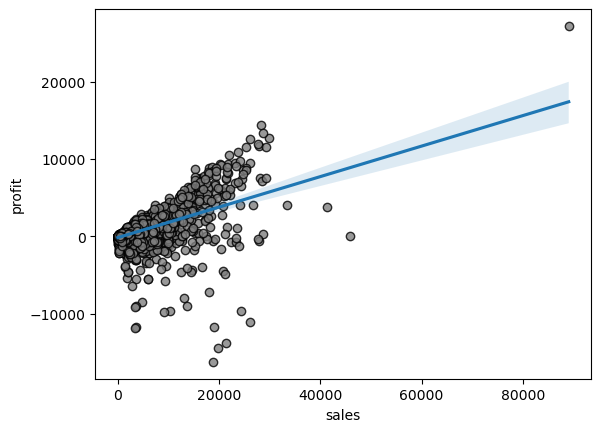

In [53]:
# Visualization of relatonship between Sales and Profit 
sns.regplot(x='sales', y='profit', data=df, scatter_kws={'edgecolor': 'black', 'color': 'grey'})

## Q2

In [54]:
# Check if the correlation between sales and profit is significant 
import pingouin as pg
pg.corr(x=df['sales'], y=df['profit'])

,n,r,CI95%,p-val,BF10,power
pearson,8399,0.577657,"[0.56, 0.59]",0.0,inf,1.0


As *p-value < 0.05* the storng positive correlatin between sales and profit is significant. 

## Q3

# Your storytelling below:

- The product category Technology outnumber all other categories in terms of sales volume. Within Technology, Office Machines contribute to most of the porfit. 
- The company need to shift focus towards furniture sales in the eastern region as they are experiencing financial loss in this region. 
- Surprisingly, Tables and Bookcases seem to be the most unprofitable Furniture types. 
- 2012 was the least profitable year among all. 
- Telephones and Communication are the most profitable technology products